# **Setup**

Download auto-mpg dataset (only when using Google Colab)

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

Read the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

import seaborn as sns
# sns.set(font_scale = 2)



In [4]:
# dataset_path = '/content/drive/My Drive/Colab Notebooks/auto-mpg.data'
dataset_path = 'auto-mpg.data'

column_names=["mpg","cylinders","displacement","horsepower","weight",
       "acceleration","model_year","origin"]
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
print(raw_dataset.shape)
raw_dataset.tail()

(392, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1
391,31.0,4,119.0,82.0,2720.0,19.4,82,1


horsepower has 6 missing values. To keep the problem simple, drop those rows.

In [5]:
raw_dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [6]:
raw_dataset = raw_dataset.dropna()

In [7]:
raw_dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
raw_dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1
391,31.0,4,119.0,82.0,2720.0,19.4,82,1


# **Estimation of Raw Dataset**

Split dataset into train and test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
features = raw_dataset.copy()
targets = features.pop('mpg')
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 2017147594)

Create Regression Models

Print RSMEs of each model

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [12]:
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X,y)
predictions = rf.predict(X_test)
rf_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('RandomForestRegressor rsme: ', rf_rsme)
rf_score = rf.score(X_test, y_test)
print('RandomForest R2 Squared: ', rf_score)

RandomForestRegressor rsme:  3.4750377468125664
RandomForest R2 Squared:  0.819362857365144


In [13]:
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(X,y)
predictions = xgb.predict(X_test)
xgb_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('XGBRegressor rsme: ', xgb_rsme)
xgb_score = xgb.score(X_test, y_test)
print('XGB R2 Squared: ', xgb_score)

XGBRegressor rsme:  3.713212704973859
XGB R2 Squared:  0.7937529917235734


In [14]:
lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)
lr_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('LinearRegression rsme: ', lr_rsme)
lr_score = lr.score(X_test, y_test)
print('Linear R2 Squared: ', lr_score)

LinearRegression rsme:  3.790944603664544
Linear R2 Squared:  0.7850275141304223


In [15]:
tree = DecisionTreeRegressor()
tree.fit(X,y)
predictions = tree.predict(X_test)
tree_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('DecisionTreeRegressor rsme: ', tree_rsme)
tree_score = tree.score(X_test, y_test)
print('DecisionTree R2 Squared: ', tree_score)

DecisionTreeRegressor rsme:  4.896588841068955
DecisionTree R2 Squared:  0.6413463300578672


In [16]:
svm = SVR()
svm.fit(X,y)
predictions = svm.predict(X_test)
svm_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('SVM rsme: ', svm_rsme)
svm_score = svm.score(X_test, y_test)
print('SVM R2 Squared: ', svm_score)

SVM rsme:  4.927589100528211
SVM R2 Squared:  0.6367906884492904


In [17]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X,y)
predictions = knn.predict(X_test)
knn_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('KNeighborRegressor rsme: ', knn_rsme)
knn_score = knn.score(X_test, y_test)
print('KNN R2 Squared: ', knn_score)

KNeighborRegressor rsme:  4.9303241478154
KNN R2 Squared:  0.6363873795236874


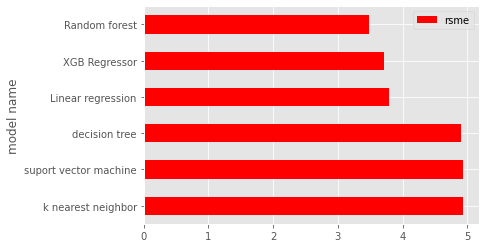

In [18]:
plt.style.use("ggplot")
model_comparison = pd.DataFrame({"model name":["Linear regression", "k nearest neighbor", "suport vector machine",
                                              "decision tree","XGB Regressor", "Random forest"],
                                "rsme": [lr_rsme,knn_rsme,svm_rsme,tree_rsme,xgb_rsme,rf_rsme]})
model_comparison = model_comparison.sort_values("rsme", ascending=False).plot(x="model name", y="rsme", color="red", kind="barh")

# **Dataset Analysis**

In [19]:
dataset = raw_dataset.copy()

Generate descriptive statistics.

In [20]:
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Correlation between mpg and features

In [21]:
corr_dataset = dataset.corr()
corr_dataset["mpg"].sort_values(ascending=False)
# dataset.corr()

mpg             1.000000
model_year      0.580541
origin          0.565209
acceleration    0.423329
cylinders      -0.777618
horsepower     -0.778427
displacement   -0.805127
weight         -0.832244
Name: mpg, dtype: float64

feature plot

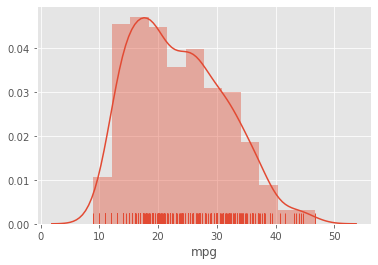

In [22]:
sns.distplot(raw_dataset['mpg'], kde=True, rug=True)
#dataset['horsepower'].plot(kind='kde')

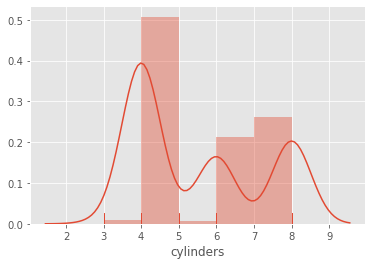

In [23]:
sns.distplot(raw_dataset['cylinders'], kde=True, rug=True)

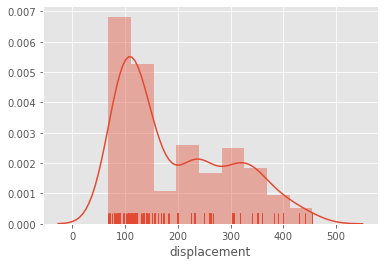

In [24]:
sns.distplot(raw_dataset['displacement'], kde=True, rug=True)

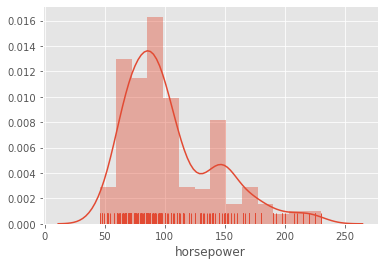

In [25]:
sns.distplot(raw_dataset['horsepower'], kde=True, rug=True)

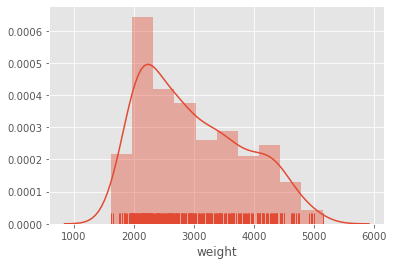

In [26]:
sns.distplot(raw_dataset['weight'], kde=True, rug=True)

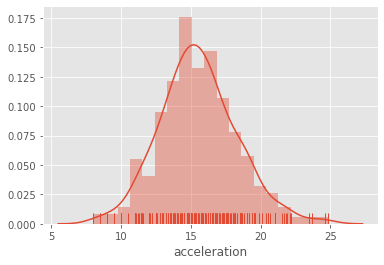

In [27]:
sns.distplot(raw_dataset['acceleration'], kde=True, rug=True)

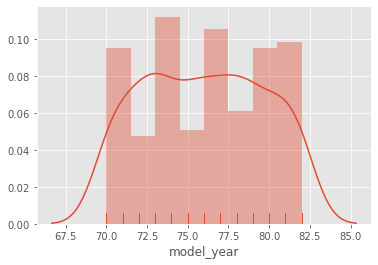

In [28]:
sns.distplot(raw_dataset['model_year'], kde=True, rug=True)

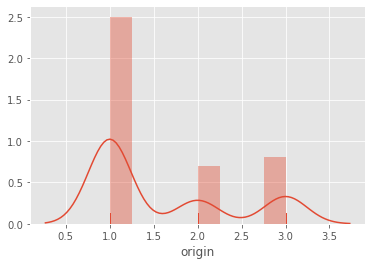

In [29]:
sns.distplot(raw_dataset['origin'], kde=True, rug=True)

c:\users\jinho\anaconda3\envs\practice\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


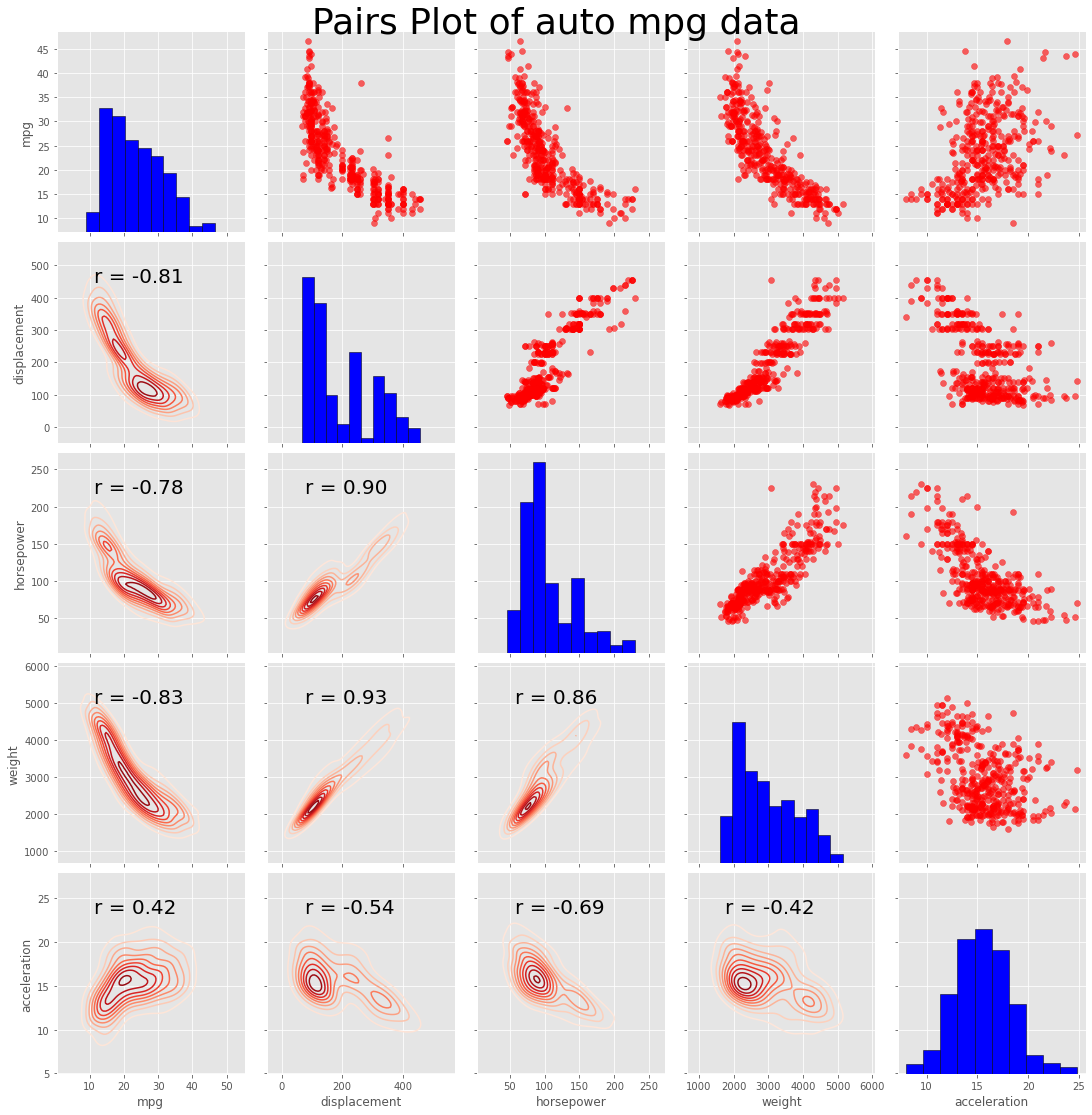

In [30]:
# Extract the columns to  plot
plot_data = dataset[['mpg', 'displacement', 
                      'horsepower', 
                      'weight', 'acceleration']]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'blue', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of auto mpg data', size = 36, y = 1.02);

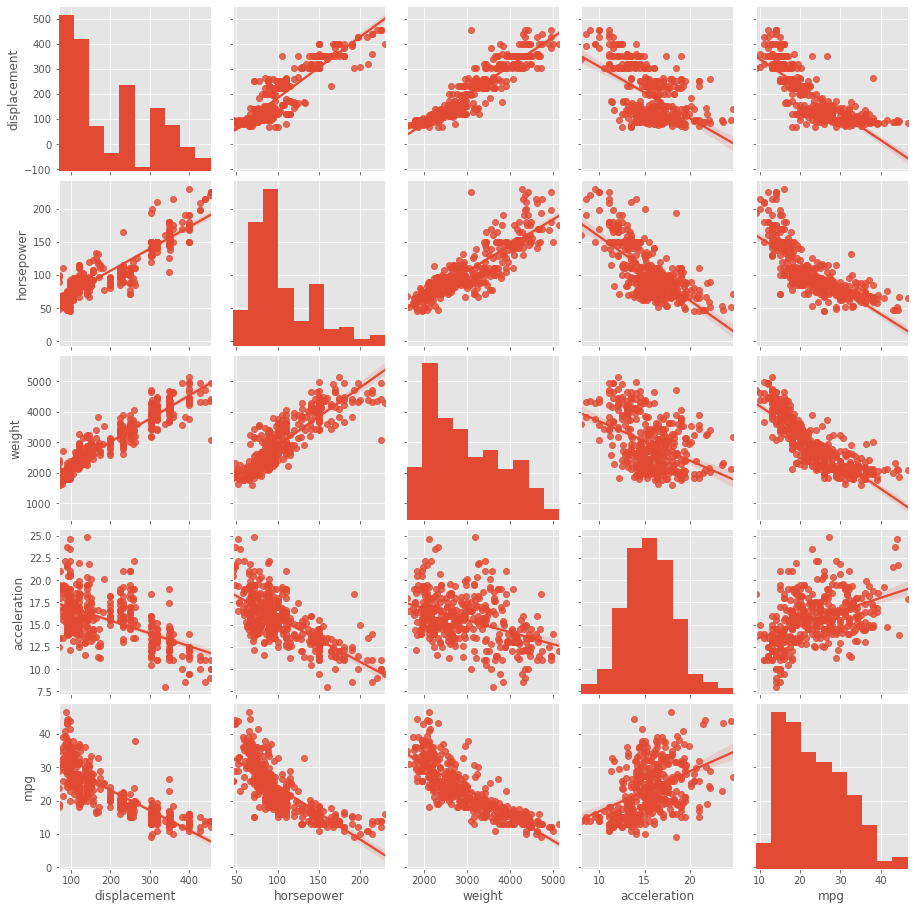

In [31]:
sns.pairplot(dataset,vars=['displacement','horsepower','weight','acceleration', 'mpg'], kind='reg')

# **Feature Engineering**

Initialize dataset variable

In [32]:
dataset = raw_dataset.copy()
my_rsme = lr_rsme
my_score = lr_score

**(Improved) Convert cylinders to one-hot encoding**



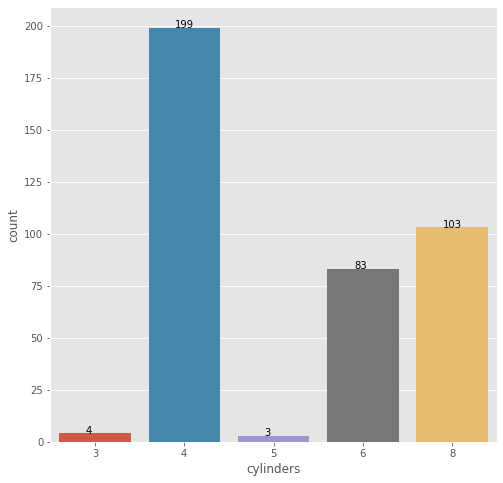

In [33]:
# show original cylinders

plt.figure(figsize=(8,8))
ax=sns.countplot(dataset['cylinders'])
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()))

In [34]:
# remove cylinders column from dataset
# add cylinder_n columns to dataset

cylinders = dataset.pop('cylinders')
dataset['cylinder_3'] = (cylinders == 3)*1.0
dataset['cylinder_4'] = (cylinders == 4)*1.0
dataset['cylinder_5'] = (cylinders == 5)*1.0
dataset['cylinder_6'] = (cylinders == 6)*1.0
dataset['cylinder_8'] = (cylinders == 8)*1.0

dataset.tail()

,mpg,displacement,horsepower,weight,acceleration,model_year,origin,cylinder_3,cylinder_4,cylinder_5,cylinder_6,cylinder_8
387,27.0,140.0,86.0,2790.0,15.6,82,1,0.0,1.0,0.0,0.0,0.0
388,44.0,97.0,52.0,2130.0,24.6,82,2,0.0,1.0,0.0,0.0,0.0
389,32.0,135.0,84.0,2295.0,11.6,82,1,0.0,1.0,0.0,0.0,0.0
390,28.0,120.0,79.0,2625.0,18.6,82,1,0.0,1.0,0.0,0.0,0.0
391,31.0,119.0,82.0,2720.0,19.4,82,1,0.0,1.0,0.0,0.0,0.0


In [35]:
features = dataset.copy()
targets = features.pop('mpg')
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 2017147594)

previous_rsme = my_rsme
previous_score = my_score

lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)
my_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('Linear rsme: ', lr_rsme)
print('My RSME: ', my_rsme)
print('RSME Compared to original: ', my_rsme - lr_rsme)
print('RSME Compared to previous: ', my_rsme - previous_rsme)
print()

my_score = lr.score(X_test, y_test)
print('Linear R2: ', lr_score)
print('My R2: ', my_score)
print('R2 Compared to original: ', my_score - lr_score)
print('R2 Compared to previous: ', my_score - previous_score)

Linear rsme:  3.790944603664544
My RSME:  3.647512789422819
RSME Compared to original:  -0.14343181424172524
RSME Compared to previous:  -0.14343181424172524

Linear R2:  0.7850275141304223
My R2:  0.8009869072863874
R2 Compared to original:  0.015959393155965174
R2 Compared to previous:  0.015959393155965174


In [36]:
step1_rsme = my_rsme
step1_score = my_score

**(Improved) Log-Transformation**

In [37]:
# Add new columns with log-transformed values
for col in dataset.columns:
  if col == 'displacement' or col == 'horsepower' or col == 'weight' or col == 'acceleration':
    dataset['log_' + col] = np.log1p(dataset[col])
  else:
    next

dataset.tail()

,mpg,displacement,horsepower,weight,acceleration,model_year,origin,cylinder_3,cylinder_4,cylinder_5,cylinder_6,cylinder_8,log_displacement,log_horsepower,log_weight,log_acceleration
387,27.0,140.0,86.0,2790.0,15.6,82,1,0.0,1.0,0.0,0.0,0.0,4.948760,4.465908,7.934155,2.809403
388,44.0,97.0,52.0,2130.0,24.6,82,2,0.0,1.0,0.0,0.0,0.0,4.584967,3.970292,7.664347,3.242592
389,32.0,135.0,84.0,2295.0,11.6,82,1,0.0,1.0,0.0,0.0,0.0,4.912655,4.442651,7.738924,2.533697
390,28.0,120.0,79.0,2625.0,18.6,82,1,0.0,1.0,0.0,0.0,0.0,4.795791,4.382027,7.873217,2.975530
391,31.0,119.0,82.0,2720.0,19.4,82,1,0.0,1.0,0.0,0.0,0.0,4.787492,4.418841,7.908755,3.015535


In [38]:
features = dataset.copy()
targets = features.pop('mpg')
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 2017147594)

previous_rsme = my_rsme
previous_score = my_score

lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)
my_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('Linear rsme: ', lr_rsme)
print('My RSME: ', my_rsme)
print('RSME Compared to original: ', my_rsme - lr_rsme)
print('RSME Compared to previous: ', my_rsme - previous_rsme)
print()

my_score = lr.score(X_test, y_test)
print('Linear R2: ', lr_score)
print('My R2: ', my_score)
print('R2 Compared to original: ', my_score - lr_score)
print('R2 Compared to previous: ', my_score - previous_score)

Linear rsme:  3.790944603664544
My RSME:  3.3289564352009595
RSME Compared to original:  -0.4619881684635847
RSME Compared to previous:  -0.31855635422185946

Linear R2:  0.7850275141304223
My R2:  0.8342306534240902
R2 Compared to original:  0.04920313929366793
R2 Compared to previous:  0.03324374613770276


In [39]:
step2_rsme = my_rsme
step2_score = my_score

In [40]:
# print correlations with mpg
correlations = dataset.corr()
correlations['mpg'].sort_values(ascending=False)

mpg                 1.000000
cylinder_4          0.760490
model_year          0.580541
origin              0.565209
log_acceleration    0.435404
acceleration        0.423329
cylinder_5          0.044171
cylinder_3         -0.037721
cylinder_6         -0.230873
cylinder_8         -0.649667
horsepower         -0.778427
displacement       -0.805127
log_horsepower     -0.817346
log_displacement   -0.828442
weight             -0.832244
log_weight         -0.844192
Name: mpg, dtype: float64

Log-Transformed features seems to be normalized when compared to original features

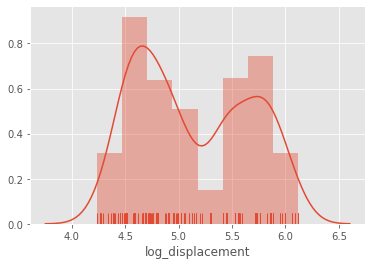

In [41]:
sns.distplot(dataset['log_displacement'], kde=True, rug=True)

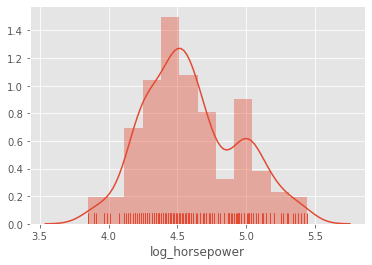

In [42]:
sns.distplot(dataset['log_horsepower'], kde=True, rug=True)

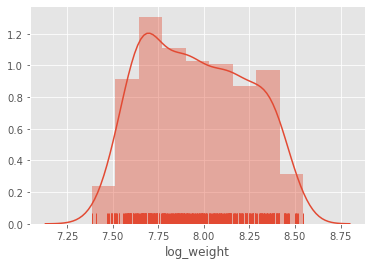

In [43]:
sns.distplot(dataset['log_weight'], kde=True, rug=True)

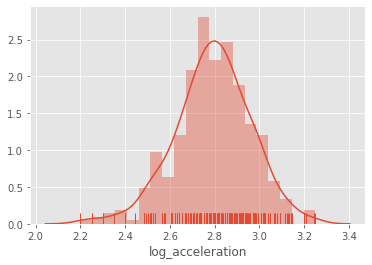

In [44]:
sns.distplot(dataset['log_acceleration'], kde=True, rug=True)

show pair plots of new features with regression line

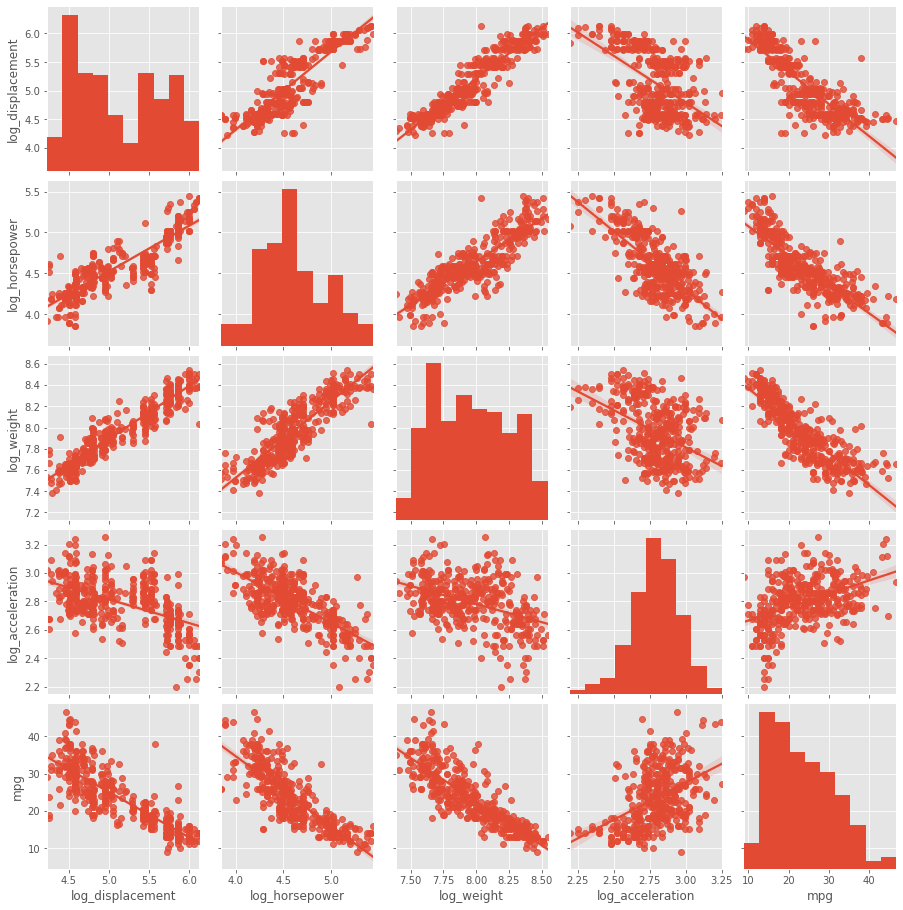

In [45]:
sns.pairplot(dataset,vars=['log_displacement','log_horsepower','log_weight','log_acceleration', 'mpg'], kind='reg')

c:\users\jinho\anaconda3\envs\practice\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


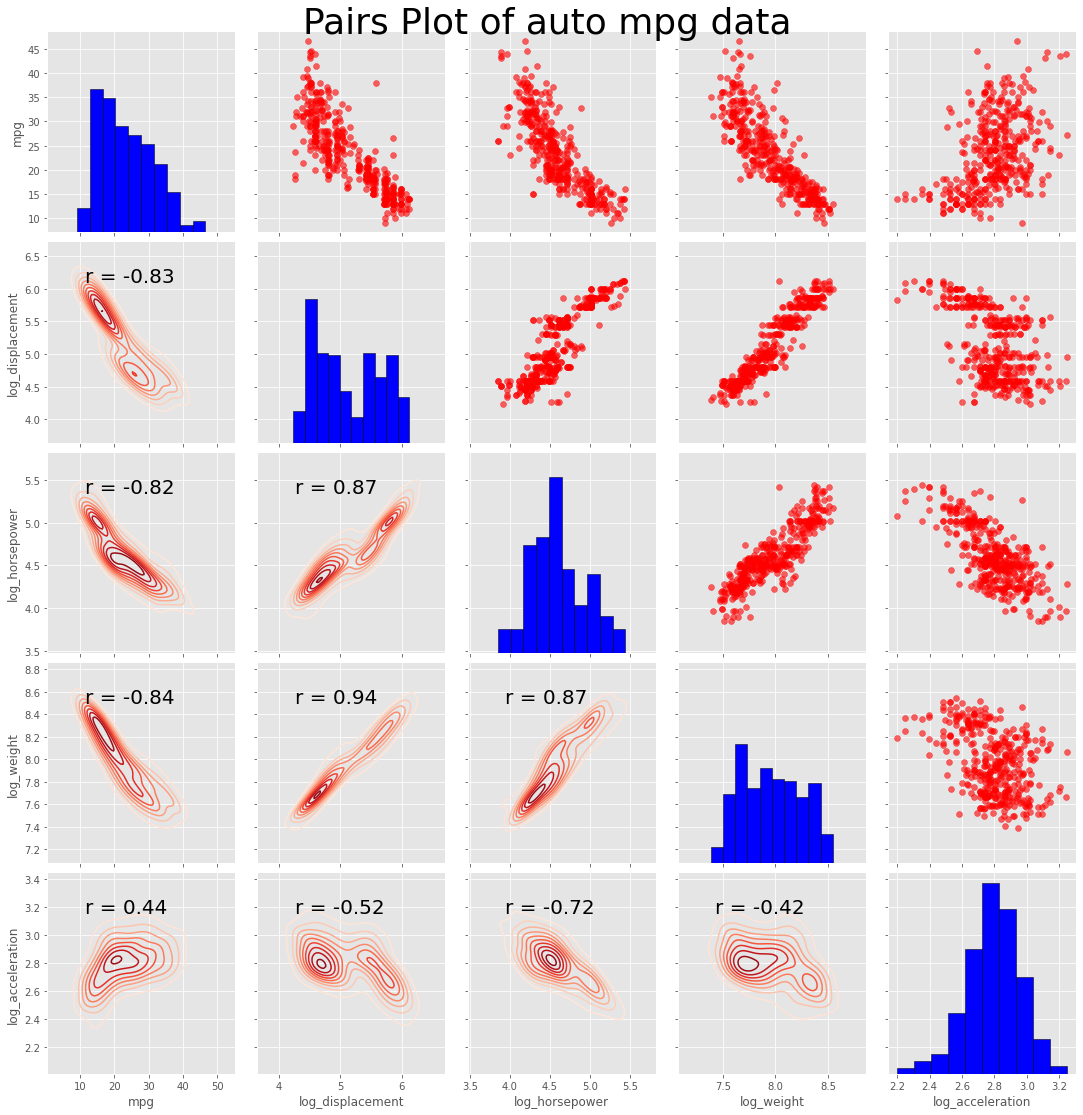

In [46]:
# Extract the columns to  plot
plot_data = dataset[['mpg', 'log_displacement', 
                      'log_horsepower', 
                      'log_weight', 'log_acceleration']]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'blue', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of auto mpg data', size = 36, y = 1.02);

**(Improved) Sqaure Root Transformation**

In [47]:
# add new columns with sqaure root transformation
for col in dataset.columns:
  if col == 'displacement' or col == 'horsepower' or col == 'weight' or col == 'acceleration':
    dataset['sqrt_' + col] = np.sqrt(dataset[col])
  else:
    next

dataset.tail()

,mpg,displacement,horsepower,weight,acceleration,model_year,origin,cylinder_3,cylinder_4,cylinder_5,cylinder_6,cylinder_8,log_displacement,log_horsepower,log_weight,log_acceleration,sqrt_displacement,sqrt_horsepower,sqrt_weight,sqrt_acceleration
387,27.0,140.0,86.0,2790.0,15.6,82,1,0.0,1.0,0.0,0.0,0.0,4.948760,4.465908,7.934155,2.809403,11.832160,9.273618,52.820451,3.949684
388,44.0,97.0,52.0,2130.0,24.6,82,2,0.0,1.0,0.0,0.0,0.0,4.584967,3.970292,7.664347,3.242592,9.848858,7.211103,46.151923,4.959839
389,32.0,135.0,84.0,2295.0,11.6,82,1,0.0,1.0,0.0,0.0,0.0,4.912655,4.442651,7.738924,2.533697,11.618950,9.165151,47.906158,3.405877
390,28.0,120.0,79.0,2625.0,18.6,82,1,0.0,1.0,0.0,0.0,0.0,4.795791,4.382027,7.873217,2.975530,10.954451,8.888194,51.234754,4.312772
391,31.0,119.0,82.0,2720.0,19.4,82,1,0.0,1.0,0.0,0.0,0.0,4.787492,4.418841,7.908755,3.015535,10.908712,9.055385,52.153619,4.404543


In [48]:
features = dataset.copy()
targets = features.pop('mpg')
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 2017147594)

previous_rsme = my_rsme
previous_score = my_score

lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)
my_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('Linear rsme: ', lr_rsme)
print('My RSME: ', my_rsme)
print('RSME Compared to original: ', my_rsme - lr_rsme)
print('RSME Compared to previous: ', my_rsme - previous_rsme)
print()

my_score = lr.score(X_test, y_test)
print('Linear R2: ', lr_score)
print('My R2: ', my_score)
print('R2 Compared to original: ', my_score - lr_score)
print('R2 Compared to previous: ', my_score - previous_score)

Linear rsme:  3.790944603664544
My RSME:  3.275171373925965
RSME Compared to original:  -0.5157732297385791
RSME Compared to previous:  -0.053785061274994383

Linear R2:  0.7850275141304223
My R2:  0.8395439632310632
R2 Compared to original:  0.05451644910064091
R2 Compared to previous:  0.005313309806972977


In [49]:
step3_rsme = my_rsme
step3_score = my_score

**(Improved) Group model_year and Convert it to One-hot encoding**

In [50]:
# remove model_year column
model_year = dataset.pop('model_year')
# add model_year_n columns to dataset
dataset['model_year_1'] = (model_year < 73)*1.0
dataset['model_year_2'] = (model_year < 73)*(-1.0) + (model_year < 76)*1.0
dataset['model_year_3'] = (model_year < 76)*(-1.0) + (model_year < 79)*1.0
dataset['model_year_4'] = (model_year >= 79)*1.0

dataset.tail()

,mpg,displacement,horsepower,weight,acceleration,origin,cylinder_3,cylinder_4,cylinder_5,cylinder_6,...,log_weight,log_acceleration,sqrt_displacement,sqrt_horsepower,sqrt_weight,sqrt_acceleration,model_year_1,model_year_2,model_year_3,model_year_4
387,27.0,140.0,86.0,2790.0,15.6,1,0.0,1.0,0.0,0.0,...,7.934155,2.809403,11.832160,9.273618,52.820451,3.949684,0.0,0.0,0.0,1.0
388,44.0,97.0,52.0,2130.0,24.6,2,0.0,1.0,0.0,0.0,...,7.664347,3.242592,9.848858,7.211103,46.151923,4.959839,0.0,0.0,0.0,1.0
389,32.0,135.0,84.0,2295.0,11.6,1,0.0,1.0,0.0,0.0,...,7.738924,2.533697,11.618950,9.165151,47.906158,3.405877,0.0,0.0,0.0,1.0
390,28.0,120.0,79.0,2625.0,18.6,1,0.0,1.0,0.0,0.0,...,7.873217,2.975530,10.954451,8.888194,51.234754,4.312772,0.0,0.0,0.0,1.0
391,31.0,119.0,82.0,2720.0,19.4,1,0.0,1.0,0.0,0.0,...,7.908755,3.015535,10.908712,9.055385,52.153619,4.404543,0.0,0.0,0.0,1.0


In [51]:
features = dataset.copy()
targets = features.pop('mpg')
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 2017147594)

previous_rsme = my_rsme
previous_score = my_score

lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)
my_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('Linear rsme: ', lr_rsme)
print('My RSME: ', my_rsme)
print('RSME Compared to original: ', my_rsme - lr_rsme)
print('RSME Compared to previous: ', my_rsme - previous_rsme)
print()

my_score = lr.score(X_test, y_test)
print('Linear R2: ', lr_score)
print('My R2: ', my_score)
print('R2 Compared to original: ', my_score - lr_score)
print('R2 Compared to previous: ', my_score - previous_score)

Linear rsme:  3.790944603664544
My RSME:  3.0796020243613182
RSME Compared to original:  -0.711342579303226
RSME Compared to previous:  -0.1955693495646469

Linear R2:  0.7850275141304223
My R2:  0.8581343687090395
R2 Compared to original:  0.07310685457861721
R2 Compared to previous:  0.0185904054779763


In [52]:
step4_rsme = my_rsme
step4_score = my_score

**Standardization (RobustScaler)**

In [53]:
from sklearn.preprocessing import RobustScaler

In [54]:
features = dataset.copy()
targets = features.pop('mpg')
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 2017147594)

scaler = RobustScaler()
scaler.fit(X)
X = scaler.transform(X)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [55]:
previous_rsme = my_rsme
previous_score = my_score

lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)
my_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('Linear rsme: ', lr_rsme)
print('My RSME: ', my_rsme)
print('RSME Compared to original: ', my_rsme - lr_rsme)
print('RSME Compared to previous: ', my_rsme - previous_rsme)
print()

my_score = lr.score(X_test, y_test)
print('Linear R2: ', lr_score)
print('My R2: ', my_score)
print('R2 Compared to original: ', my_score - lr_score)
print('R2 Compared to previous: ', my_score - previous_score)

Linear rsme:  3.790944603664544
My RSME:  2.9941082655670335
RSME Compared to original:  -0.7968363380975108
RSME Compared to previous:  -0.08549375879428478

Linear R2:  0.7850275141304223
My R2:  0.8659017832961728
R2 Compared to original:  0.08087426916575058
R2 Compared to previous:  0.00776741458713337


In [56]:
step5_rsme = my_rsme
step5_score = my_score

# **Result**

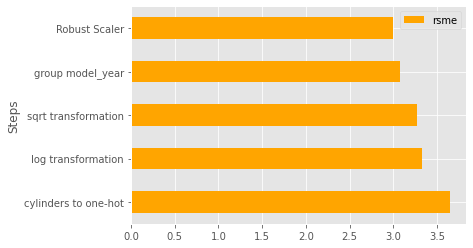

In [57]:
rsme_results = pd.DataFrame({"Steps":["cylinders to one-hot", "log transformation", "sqrt transformation",
                                              "group model_year","Robust Scaler"],
                                "rsme": [step1_rsme, step2_rsme, step3_rsme, step4_rsme, step5_rsme]})
rsme_results.plot(x="Steps", y="rsme", color='orange', kind="barh")

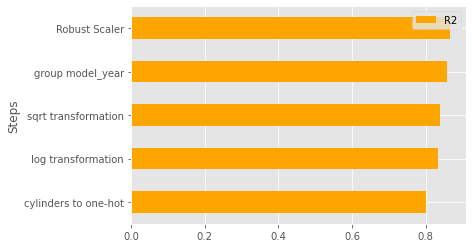

In [58]:
r2_results = pd.DataFrame({"Steps":["cylinders to one-hot", "log transformation", "sqrt transformation",
                                              "group model_year","Robust Scaler"],
                                "R2": [step1_score, step2_score, step3_score, step4_score, step5_score]})
r2_results.plot(x="Steps", y="R2", color='orange', kind="barh")

# Failed Works Below...

You don't have to execute the code below...
These are my failed feature engineering.

The codes won't work properly because I changed the order of the code cells.

**(No improvement) Since origin is categorical, convert that to one-hot encoding**

In [ ]:
origin = dataset.pop('origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

In [ ]:
features = dataset.copy()
targets = features.pop('mpg')
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 2017147594)

previous_rsme = my_rsme
previous_score = my_score

lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)
my_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('Linear rsme: ', lr_rsme)
print('My RSME: ', my_rsme)
print('RSME Compared to original: ', my_rsme - lr_rsme)
print('RSME Compared to previous: ', my_rsme - previous_rsme)
print()

my_score = lr.score(X_test, y_test)
print('Linear R2: ', lr_score)
print('My R2: ', my_score)
print('R2 Compared to original: ', my_score - lr_score)
print('R2 Compared to previous: ', my_score - previous_score)

**(No improvement) Drop origin**

In [ ]:
dataset.pop('origin')

In [58]:
features = dataset.copy()
targets = features.pop('mpg')
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 2017147594)

previous_rsme = my_rsme
previous_score = my_score

lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)
my_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('Linear rsme: ', lr_rsme)
print('My RSME: ', my_rsme)
print('RSME Compared to original: ', my_rsme - lr_rsme)
print('RSME Compared to previous: ', my_rsme - previous_rsme)
print()

my_score = lr.score(X_test, y_test)
print('Linear R2: ', lr_score)
print('My R2: ', my_score)
print('R2 Compared to original: ', my_score - lr_score)
print('R2 Compared to previous: ', my_score - previous_score)

Linear rsme:  3.790944603664543
My RSME:  3.1089874521241376
RSME Compared to original:  -0.6819571515404053
RSME Compared to previous:  0.0

Linear R2:  0.7850275141304224
My R2:  0.8554141007028812
R2 Compared to original:  0.07038658657245878
R2 Compared to previous:  0.0


**(No improvement) Model Year Bundle**

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.countplot(dataset['model_year'])
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()))

In [ ]:
dataset['model_year_bundle'] = (dataset['model_year'] >= 79) * 1.0 + (dataset['model_year'] >= 76) * 1.0 + (dataset['model_year'] >= 73) * 1.0 + (dataset['model_year'] >= 70) * 1.0

In [ ]:
plt.figure(figsize=(8,8))
ax=sns.countplot(dataset['model_year_bundle'])
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()))

In [ ]:
dataset.pop('model_year')

In [ ]:
dataset.head()

In [ ]:
features = dataset.copy()
targets = features.pop('mpg')
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 2017147594)

previous_rsme = my_rsme
previous_score = my_score

lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)
my_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('Linear rsme: ', lr_rsme)
print('My RSME: ', my_rsme)
print('RSME Compared to original: ', my_rsme - lr_rsme)
print('RSME Compared to previous: ', my_rsme - previous_rsme)
print()

my_score = lr.score(X_test, y_test)
print('Linear R2: ', lr_score)
print('My R2: ', my_score)
print('R2 Compared to original: ', my_score - lr_score)
print('R2 Compared to previous: ', my_score - previous_score)

**(No improvement) Remove Colinear Features**

In [ ]:
dataset = dataset.drop(columns=['displacement', 'horsepower', 'weight', 'acceleration'])
dataset.tail()

In [ ]:
features = dataset.copy()
targets = features.pop('mpg')
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 2017147594)

previous_rsme = my_rsme
previous_score = my_score

lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X_test)
my_rsme = np.sqrt(np.mean((y_test - predictions)**2))
print('Linear rsme: ', lr_rsme)
print('My RSME: ', my_rsme)
print('RSME Compared to original: ', my_rsme - lr_rsme)
print('RSME Compared to previous: ', my_rsme - previous_rsme)
print()

my_score = lr.score(X_test, y_test)
print('Linear R2: ', lr_score)
print('My R2: ', my_score)
print('R2 Compared to original: ', my_score - lr_score)
print('R2 Compared to previous: ', my_score - previous_score)